[[285.  45.]
 [ 45.   9.]]
[ 2.16500923 -0.3057786 ]


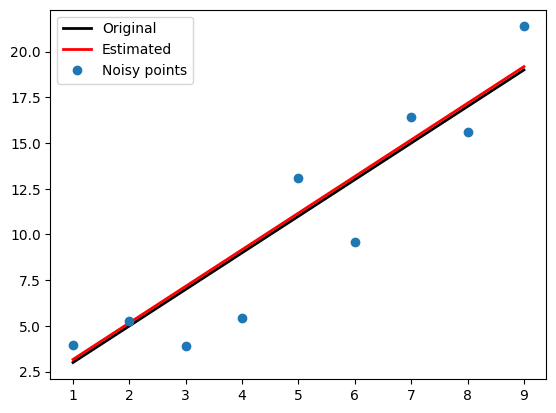

In [1]:
# Least-Squares
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2 # Line equation: y = m*x + c. m is the slope. c is the intercept.
c = 1
x = np.arange(1,10, 1)
n = 2.*np.random.randn(len(x)) # Noise
o = np.zeros(x.shape)
y = m*x + c + n + o # Noisy points confirming to a line

X = np.concatenate([x.reshape(len(x),1), np.ones((len(x), 1))], axis=1)
print(X.transpose()@X)
B = np.linalg.pinv(X.T@X)@X.T@y # Pseudo inverse computation
print(B)
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c], color='k', linestyle='-', linewidth=2, label=r'Original')
plt.plot([x[0], x[-1]], [mstar*x[0] + c, mstar*x[-1]+cstar], 
         color='r', linestyle='-', linewidth=2, label=r'Estimated')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')

[[1017.25  114.5 ]
 [ 114.5    19.  ]]
[ 2.83625057 -2.80762634]


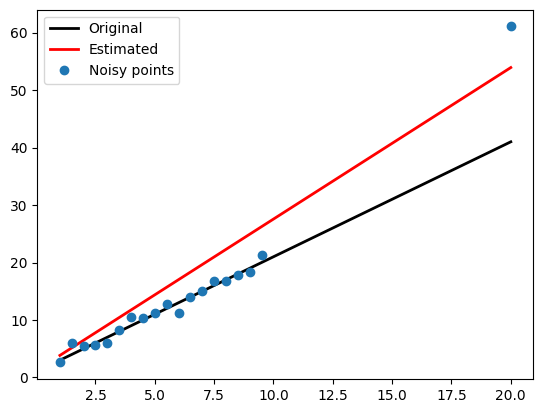

In [2]:
# Total Least Squares

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2
c = 1
x = np.arange(1,10, 0.5) # Un-corrupted x
# Append a number to x
x = np.append(x, 20)
n = np.random.randn(len(x))
o = np.zeros(x.shape)
o[-1] = 20 # Outliers
y = m*x + c + n + o

X = np.concatenate([x.reshape(len(x),1), np.ones((len(x), 1))], axis=1)
print(X.transpose()@X)
B = np.linalg.pinv(X.T@X)@X.T@y
print(B)
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c], color='k', linestyle='-', linewidth=2, label=r'Original')
plt.plot([x[0], x[-1]], [mstar*x[0] + c, mstar*x[-1]+cstar], 
         color='r', linestyle='-', linewidth=2, label=r'Estimated')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')

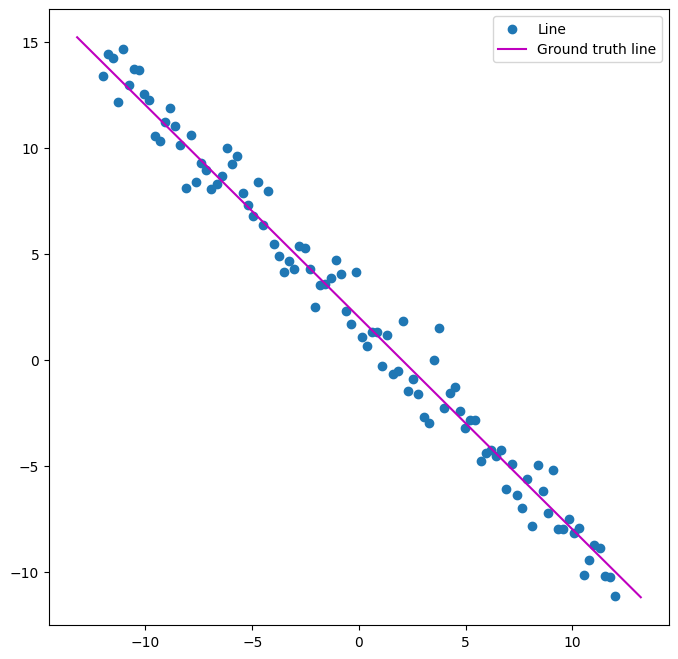

In [2]:
# Generation of a Noisy Point Set Conforming to a Line and a Circle
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

# np.random.seed(0)
N = 100
t = np.random.uniform(0, 2*np.pi, N)

s = 1.
m, c = -1, 2
x = np.linspace(-12, 12, N) 
y = m*x + c + s*np.random.randn(N)
X_line = np.hstack((x.reshape(N,1), y.reshape(N,1))) 

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1], label='Line')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m*x_ + c
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()

Best line model [0.71737135 0.696691   1.39631591]


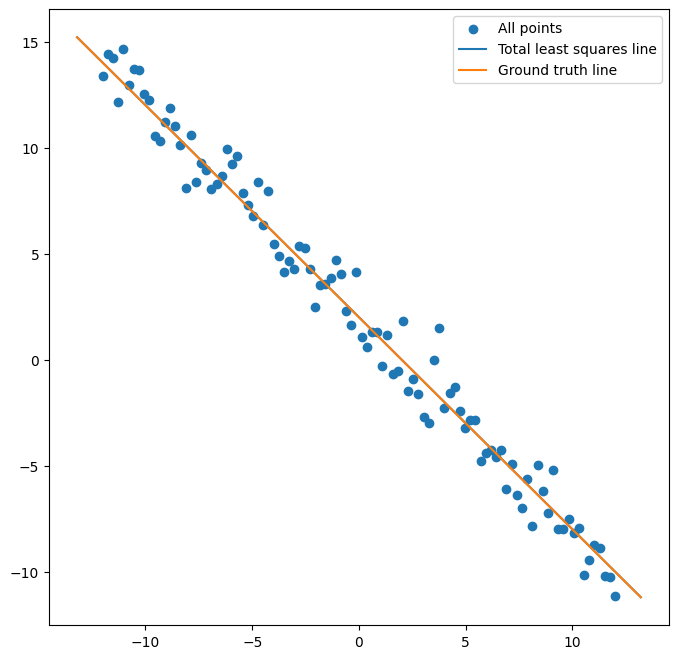

In [3]:
# Item 2: Line fitting with Total Least Squares
import math
N = X_line.shape[0]
X_ = X_line


U = X_ - np.mean(X_, axis=0)

# Eigenvector of 𝑈^𝑇𝑈 associated with the smallest eigenvalue
_, _, Vt = np.linalg.svd(np.transpose(U)@U)
a, b = Vt[-1, 0], Vt[-1, 1]
d = a*np.mean(X_[:,0]) + b*np.mean(X_[:,1])
best_model_line = np.array([a, b, d])

print('Best line model', best_model_line)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1], label='All points')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_, label='Total least squares line')
y_ = m*x_ + c
plt.plot(x_, y_, label='Ground truth line')
plt.legend()